In [90]:

import numpy as np
import pandas as pd

import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [91]:
dataset = 'keypoint.csv'
model_save_path = 'keypoint_classifier.hdf5'


NUM_CLASSES = 6
x_df = pd.read_csv(dataset, usecols=list(range(1, (21 * 2) + 1)), dtype='float32')
y_df = pd.read_csv(dataset, usecols=[0], dtype='float32')

# mask = y_df['0'] != 4  # Create a boolean mask for labels not equal to 4

# # Filter both x_df and y_df using the mask
# x_df = x_df[mask]
# y_df = y_df[mask]


X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, train_size=0.75, random_state=RANDOM_SEED)


In [92]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21*2,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax'),
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_10 (Dropout)        (None, 42)                0         
                                                                 
 dense_15 (Dense)            (None, 20)                860       
                                                                 
 dropout_11 (Dropout)        (None, 20)                0         
                                                                 
 dense_16 (Dense)            (None, 10)                210       
                                                                 
 dense_17 (Dense)            (None, 6)                 66        
                                                                 
Total params: 1136 (4.44 KB)
Trainable params: 1136 (4.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [93]:
'''
ModelCheckpoint:
cp_callback saves the model or weights during training at certain
intervals, which is particularly useful to prevent the loss of 
the model in case of a training interruption

EarlyStopping:
es_callback stops training when a monitored metric has stopped
improving, which helps to avoid overfitting
'''

cp_callback = tf.keras.callbacks.ModelCheckpoint(model_save_path, verbose=1, save_weights_only=False)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)


In [94]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [95]:
# print(y_df['0'].unique())  # Replace 'label_column_name' with the actual name of your label column

In [96]:
model.fit(X_train,
          y_train,
          epochs=1000,
          batch_size=128,
          validation_data=(X_test, y_test),
          callbacks=[cp_callback, es_callback])

Epoch 1/1000
 1/50 [..............................] - ETA: 24s - loss: 1.9003 - accuracy: 0.1719
Epoch 1: saving model to keypoint_classifier.hdf5
50/50 [==============================] - 1s 5ms/step - loss: 1.8001 - accuracy: 0.1813 - val_loss: 1.7069 - val_accuracy: 0.2428
Epoch 2/1000
38/50 [=====================>........] - ETA: 0s - loss: 1.7170 - accuracy: 0.2344
Epoch 2: saving model to keypoint_classifier.hdf5
50/50 [==============================] - 0s 3ms/step - loss: 1.7073 - accuracy: 0.2395 - val_loss: 1.6119 - val_accuracy: 0.3748
Epoch 3/1000
 1/50 [..............................] - ETA: 0s - loss: 1.6297 - accuracy: 0.2969

c:\Users\safda\anaconda3\envs\computervision_env\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


44/50 [=========================>....] - ETA: 0s - loss: 1.6295 - accuracy: 0.2907
Epoch 3: saving model to keypoint_classifier.hdf5
50/50 [==============================] - 0s 2ms/step - loss: 1.6225 - accuracy: 0.2939 - val_loss: 1.4963 - val_accuracy: 0.5348
Epoch 4/1000
41/50 [=======================>......] - ETA: 0s - loss: 1.5534 - accuracy: 0.3296
Epoch 4: saving model to keypoint_classifier.hdf5
50/50 [==============================] - 0s 3ms/step - loss: 1.5491 - accuracy: 0.3339 - val_loss: 1.3878 - val_accuracy: 0.5409
Epoch 5/1000
44/50 [=========================>....] - ETA: 0s - loss: 1.4811 - accuracy: 0.3768
Epoch 5: saving model to keypoint_classifier.hdf5
50/50 [==============================] - 0s 3ms/step - loss: 1.4769 - accuracy: 0.3774 - val_loss: 1.2932 - val_accuracy: 0.6200
Epoch 6/1000
28/50 [===============>..............] - ETA: 0s - loss: 1.4416 - accuracy: 0.4060
Epoch 6: saving model to keypoint_classifier.hdf5
50/50 [==============================] - 0

In [97]:
# print(y_df['0'].unique())  # Replace '0' with the actual name of your label column

In [98]:
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)


17/17 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.9087


In [99]:
model = tf.keras.models.load_model(model_save_path)
predict_result = model.predict([X_test.iloc[0].values.reshape(1, 42)])
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 38ms/step
[0.00796905 0.00505186 0.01383527 0.8626243  0.09535608 0.01516335]
3


67/67 [==============================] - 0s 709us/step


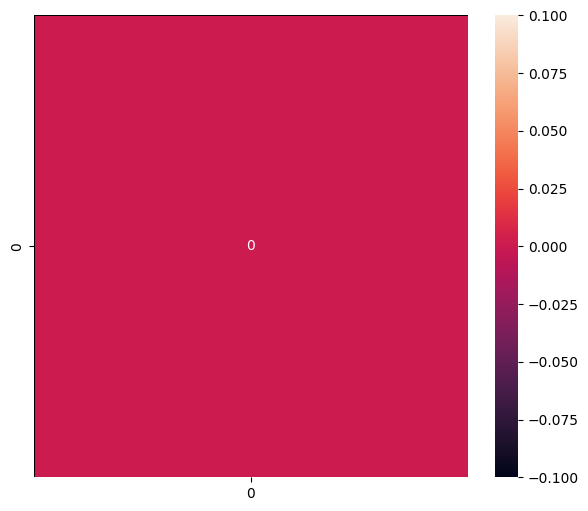

Classification Report
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       406
         1.0       0.98      0.71      0.82       397
         2.0       0.68      0.88      0.77       306
         3.0       0.92      1.00      0.95       347
         4.0       0.99      0.97      0.98       343
         5.0       0.94      0.99      0.96       314

    accuracy                           0.91      2113
   macro avg       0.91      0.91      0.91      2113
weighted avg       0.92      0.91      0.91      2113



In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


def print_confusion_matrix(y_true, y_pred, report=True):
    y_true = y_true.astype(int) 
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False,linewidths=0.5, linecolor='black')
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)


In [101]:
model.save(model_save_path, include_optimizer=False)

c:\Users\safda\anaconda3\envs\computervision_env\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [102]:
'''
TensorFlow Lite (TFLite) is a lightweight, cross-platform library
designed to run machine learning models on mobile and edge devices.
specifically optimized for low-latency inference on resource-constrained 
environments like mobile phones, embedded systems, and IoT devices.
'''

tflite_save_path = 'keypoint_classifier.tflite'
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open(tflite_save_path, 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\safda\AppData\Local\Temp\tmpmiqos9ww\assets


INFO:tensorflow:Assets written to: C:\Users\safda\AppData\Local\Temp\tmpmiqos9ww\assets


6692

In [103]:

interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()   # This prepares the interpreter to run inference by allocating memory for the input and output tensors

In [104]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [105]:
interpreter.set_tensor(input_details[0]['index'], np.array(X_test.iloc[0].values.reshape(1, 42)))


In [106]:
%%time
#invoke tensorflow lite and store the results
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])


CPU times: total: 0 ns
Wall time: 0 ns


In [107]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.00796905 0.00505186 0.01383528 0.86262435 0.09535611 0.01516336]
3
